### First load all the Small Cap tickers, get the metadata. Data downloaded from TradingView

In [17]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

import pandas as pd

# Load the CSV file
df = pd.read_csv('smallcap.csv')  # Make sure to replace '/path/to/your/smallcap.csv' with the actual file path

# Extract the tickers into a list
tickers = df['Symbol'].tolist()

# Now, 'tickers' contains all the tickers from the "Symbol" column of your CSV file
print(len(tickers))
print(df.head())


9224


### Find the (ticker, day, percentage) tuple where premarket gain for that ticker is more than 40%

In [23]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Example tickers for demonstration
# tickers = ["AAPL"]  # A small subset for demonstration

# Placeholder for identified tickers and days where open price is 40% more than previous day's close price
pre_market_gains = []

# Loop over the tickers
for ticker in tickers:
    # Download daily price data for the past 60 days for these tickers, I chose 60 days because yfinance only stores 60 days of intraday data
    data = yf.Ticker(ticker).history(period='60d', interval='1d')

    # Calculate the premarket gain and check if it's more than 40%
    for i in range(1, len(data)):
        previous_close = data['Close'][i - 1]
        today_open = data['Open'][i]
        premarket_gain = ((today_open - previous_close) / previous_close) * 100

        if premarket_gain > 40:
            pre_market_gains.append((ticker, data.index[i].date(), premarket_gain))

print(pre_market_gains)
print(len(pre_market_gains))


Failed to get ticker 'PEB/PG' reason: Expecting value: line 1 column 1 (char 0)
PEB/PG: No price data found, symbol may be delisted (period=60d)
Failed to get ticker 'PEB/PF' reason: Expecting value: line 1 column 1 (char 0)
PEB/PF: No price data found, symbol may be delisted (period=60d)
Failed to get ticker 'PEB/PH' reason: Expecting value: line 1 column 1 (char 0)
PEB/PH: No price data found, symbol may be delisted (period=60d)
Failed to get ticker 'PEB/PE' reason: Expecting value: line 1 column 1 (char 0)
PEB/PE: No price data found, symbol may be delisted (period=60d)
Failed to get ticker 'RLJ/PA' reason: Expecting value: line 1 column 1 (char 0)
RLJ/PA: No price data found, symbol may be delisted (period=60d)
Failed to get ticker 'CODI/PA' reason: Expecting value: line 1 column 1 (char 0)
CODI/PA: No price data found, symbol may be delisted (period=60d)
Failed to get ticker 'CODI/PB' reason: Expecting value: line 1 column 1 (char 0)
CODI/PB: No price data found, symbol may be del

[('SOUN', datetime.date(2024, 2, 15), 77.82705212305655), ('LIFX', datetime.date(2024, 3, 5), 45.20000457763672), ('GERN', datetime.date(2024, 3, 15), 71.42857142857143), ('FUSN', datetime.date(2024, 3, 19), 96.99246624203663), ('FDMT', datetime.date(2024, 2, 5), 71.81246215156126), ('CMRF', datetime.date(2024, 1, 25), 300.00000599915984), ('CMRF', datetime.date(2024, 2, 2), 1500.0016023602766), ('CMRF', datetime.date(2024, 2, 9), 224.99997774501844), ('CMRF', datetime.date(2024, 2, 16), 76.92308903821564), ('CMRF', datetime.date(2024, 3, 6), 1469.565143308028), ('GLDAF', datetime.date(2024, 1, 4), 49.25372954845214), ('TBLMF', datetime.date(2024, 1, 17), 150.62968620815957), ('BKALF', datetime.date(2024, 3, 1), 137.30685027441328), ('TPGVF', datetime.date(2024, 2, 5), 40.93529268800712), ('BITGF', datetime.date(2024, 3, 25), 40.58334032694499), ('KAMN', datetime.date(2024, 1, 19), 100.93624155482952), ('MIESY', datetime.date(2024, 2, 21), 44.1005744550314), ('SPMYY', datetime.date(202

### For these tuples, find the price at 9:30 and 10:30 ET

In [43]:
import yfinance as yf
import pandas as pd

# Placeholder for the results
price_data = []

def add_one_day(date):
    next_day = date + timedelta(days=1)
    return date, next_day

for ticker, day, premarket_change in pre_market_gains:
    start_day, end_day = add_one_day(day)
    # Formatting dates for yfinance
    start_day_str = start_day.strftime("%Y-%m-%d")
    end_day_str = end_day.strftime("%Y-%m-%d")

    try:
        # Fetching the data with a 5-minute interval for the whole day
        data = yf.download(ticker, start=start_day_str, end=end_day_str, interval='5m')

        # Ensure data is not empty
        if not data.empty:
            # Extract prices at 9:30 (market open) and at 10:30
            price_at_930 = data.iloc[0]['Open']  # Open price at the first timestamp (9:30 AM)
            if len(data) >= 13:  # 12 intervals of 5 mins = 1 hour
                price_at_1030 = data.iloc[12]['Close']  # Close price 1 hour after market open

                # Calculate the percentage change
                percentage_change = ((price_at_1030 - price_at_930) / price_at_930) * 100

                # Store the results
                price_data.append((ticker, day.strftime("%Y-%m-%d"), price_at_930, price_at_1030, percentage_change, premarket_change))
    except Exception as e:
        print(f"Failed to download data for {ticker} on {day.strftime('%Y-%m-%d')}: {e}")

# Convert the results into a DataFrame for easy viewing or saving to CSV
price_df = pd.DataFrame(price_data, columns=['Ticker', 'Date', 'Price at 9:30', 'Price at 10:30', 'Percentage Change', 'Premarket Change'])

print(price_df)

# Optionally, save the DataFrame to a CSV file
# price_df.to_csv('market_prices.csv', index=False)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CMRF']: Exception('%ticker%: 5m data not available for startTime=1706158800 and endTime=1706245200. The requested range must be within the last 60 days.')
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['CMRF']: Exception('%ticker%: No price data found, symbol may be delisted (5m 2024-02-02 -> 2024-02-03)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*****

    Ticker        Date  Price at 9:30  Price at 10:30  Percentage Change  \
0     SOUN  2024-02-15       4.010000        3.299800         -17.710730   
1     LIFX  2024-03-05       7.260000        8.000000          10.192834   
2     GERN  2024-03-15       3.020000        3.330000          10.264899   
3     FUSN  2024-03-19      20.959999       20.995001           0.166993   
4     FDMT  2024-02-05      31.000000       32.000000           3.225806   
..     ...         ...            ...             ...                ...   
343  VYGVQ  2024-02-23       0.000400        0.000100         -75.000000   
344   GSFI  2024-02-09       0.000200        0.000100         -50.000000   
345   GSFI  2024-02-20       0.000100        0.000100           0.000000   
346  TOMDF  2024-02-07       0.000200        0.000100         -50.000000   
347  TOMDF  2024-02-26       0.000200        0.000100         -50.000000   

     Premarket Change  
0           77.827052  
1           45.200005  
2           71.

In [44]:
price_df.to_csv('market_prices.csv', index=False)

### Some statistical analysis

/var/folders/jb/x5q2pkmx3p5_x479n8vzms6c0000gn/T/ipykernel_64349/652499989.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_df['Sector'] = np.nan


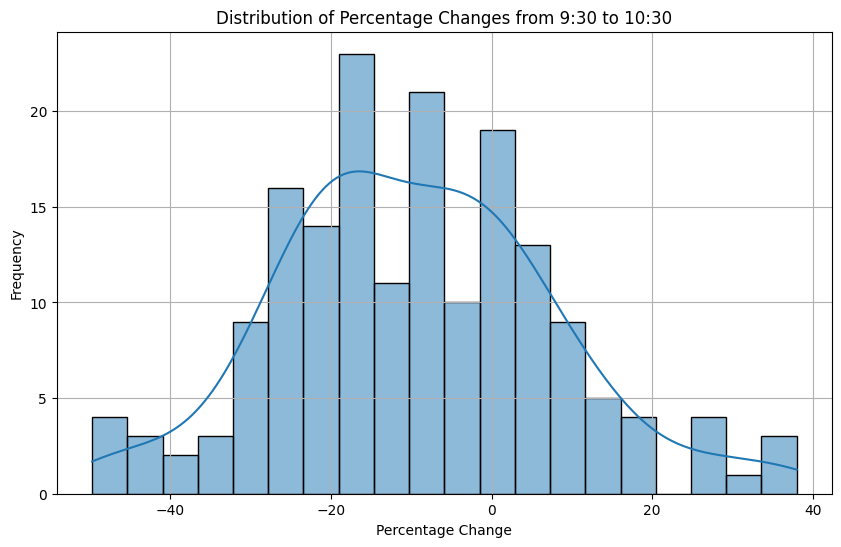

Price change summary:


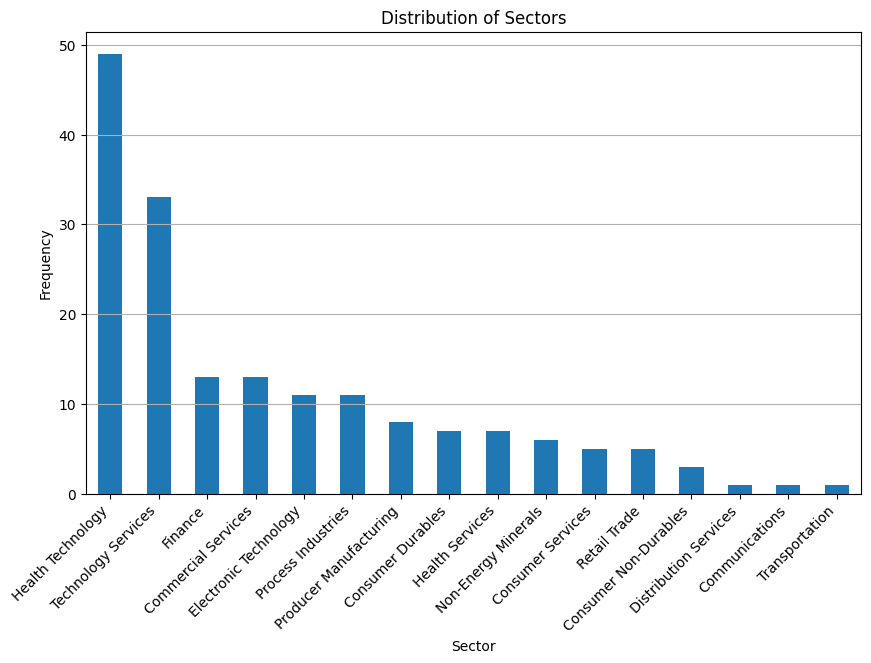

Sector
Health Technology         49
Technology Services       33
Finance                   13
Commercial Services       13
Electronic Technology     11
Process Industries        11
Producer Manufacturing     8
Consumer Durables          7
Health Services            7
Non-Energy Minerals        6
Consumer Services          5
Retail Trade               5
Consumer Non-Durables      3
Distribution Services      1
Communications             1
Transportation             1
Name: count, dtype: int64

In [56]:
# Re-importing necessary libraries after a reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filtered_price_df = price_df[price_df['Price at 9:30'] >= 0.1]
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = filtered_price_df['Percentage Change'].quantile(0.25)
Q3 = filtered_price_df['Percentage Change'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
no_outliers_df = filtered_price_df[(filtered_price_df['Percentage Change'] >= lower_bound) & 
                          (filtered_price_df['Percentage Change'] <= upper_bound)]

no_outliers_df['Sector'] = np.nan

# Loop through each row in no_outliers_df to set the Sector
for index, row in no_outliers_df.iterrows():
    ticker = row['Ticker']
    # Corrected variable name and used 'Ticker' or 'Symbol' according to your actual column name in df
    sector = df.loc[df['Symbol'] == ticker, 'Sector'].iloc[0] if not df.loc[df['Symbol'] == ticker, 'Sector'].empty else np.nan
    # Corrected method to assign the sector value
    no_outliers_df.at[index, 'Sector'] = sector

# Statistical Summary of Percentage Change
price_change_summary = no_outliers_df['Percentage Change'].describe()

# Histogram of Percentage Changes
plt.figure(figsize=(10, 6))
sns.histplot(no_outliers_df['Percentage Change'], kde=True, bins=20)
plt.title('Distribution of Percentage Changes from 9:30 to 10:30')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print('Price change summary:')
price_change_summary


# Calculate the frequency of each sector
sector_distribution = no_outliers_df['Sector'].value_counts()

# Visualizing the sector distribution
plt.figure(figsize=(10, 6))
sector_distribution.plot(kind='bar')
plt.title('Distribution of Sectors')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")  # Rotate sector names for better readability
plt.grid(axis='y')
plt.show()

sector_distribution



